In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import networkx as nx 


In [2]:
raw_data = pd.read_csv("raw_data.csv", header=None)


In [3]:
our_subject =pd.read_csv("subjects.csv", header=None)
our_subject = our_subject[0].tolist()
our_subject.sort()
print(our_subject)

[1710105, 1710210, 1710217, 1710417, 1712212, 1712312, 1712315, 1712417, 1712432, 1712444, 1712452, 1714297, 1714303, 1714308, 1714320, 1714396, 1714417, 1714480, 1716310, 1716405, 1716408, 1716410, 1716430, 1716448, 1718210, 1718217, 1718303, 1718312, 1718416, 1718417, 1718425, 1718436, 1718448, 1718450, 1720405, 1730115, 1730120, 1730155, 1730217, 1730220, 1730400, 1730402, 1730403, 1730420, 1730430, 1730435, 1730460, 1730499, 1732203, 1732207, 1732208, 1732303, 1732312, 1732417, 1734102, 1734102, 1734212, 1734303, 1734308, 1734333, 1734400, 1734425, 1734449, 1736310, 1740320, 1740417, 1914106, 1914251, 1914271, 2010115, 2010125]


In [4]:
def CrossCount(first, second):
    mask1 = raw_data.iloc[:,3] == first
    mask2 = raw_data.iloc[:,4] == second
    mask = mask2 & mask1

    group = raw_data[mask]
    return sum(group.iloc[:, 2])

In [5]:
cross_matrix = [[0 for j in our_subject] for i in our_subject]

for x in range(len(our_subject)):
    for y in range(len(our_subject)):
        cross_matrix[x][y] = max(CrossCount(our_subject[x], our_subject[y]), CrossCount(our_subject[y], our_subject[x]))

In [6]:
cross_matrix_df = pd.DataFrame(cross_matrix, index=our_subject, columns=our_subject)
print(cross_matrix_df)

         1710105  1710210  1710217  1710417  1712212  1712312  1712315   
1710105      200        8       21        0       12        2        1  \
1710210        8      105        0        0       98        0        1   
1710217       21        0       63        0        0        0        0   
1710417        0        0        0       69        0       13       21   
1712212       12       98        0        0      123        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1914106        2        0        1        0        0        0        0   
1914251      154        0       10        0        0        0        0   
1914271        0        1        0        1        0        0        0   
2010115        1        0        1        0        0        0        0   
2010125      157        1       12        0        1        0        0   

         1712417  1712432  1712444  ...  1734425  1734449  1736310  1740320   
1710105        1        4       

In [7]:
cross_matrix_df.to_csv("cross_matrix.csv")

In [8]:
edges = []
for i in range(len(our_subject)):
  for j in range(len(our_subject)):
   if cross_matrix[i][j] == 0: 
      edges.append([i,j])

In [16]:
G = nx.Graph()
G.add_edges_from(edges)
cliques = list(nx.find_cliques(G))
all_kernel_number = []
all_kernel_code = []

cliques = sorted(cliques, key=lambda x: len(x), reverse=True)
print(len(cliques))
for clique in cliques:
    all_kernel_code.append(set([our_subject[i] for i in clique]))
    all_kernel_number.append(set(clique))


28954


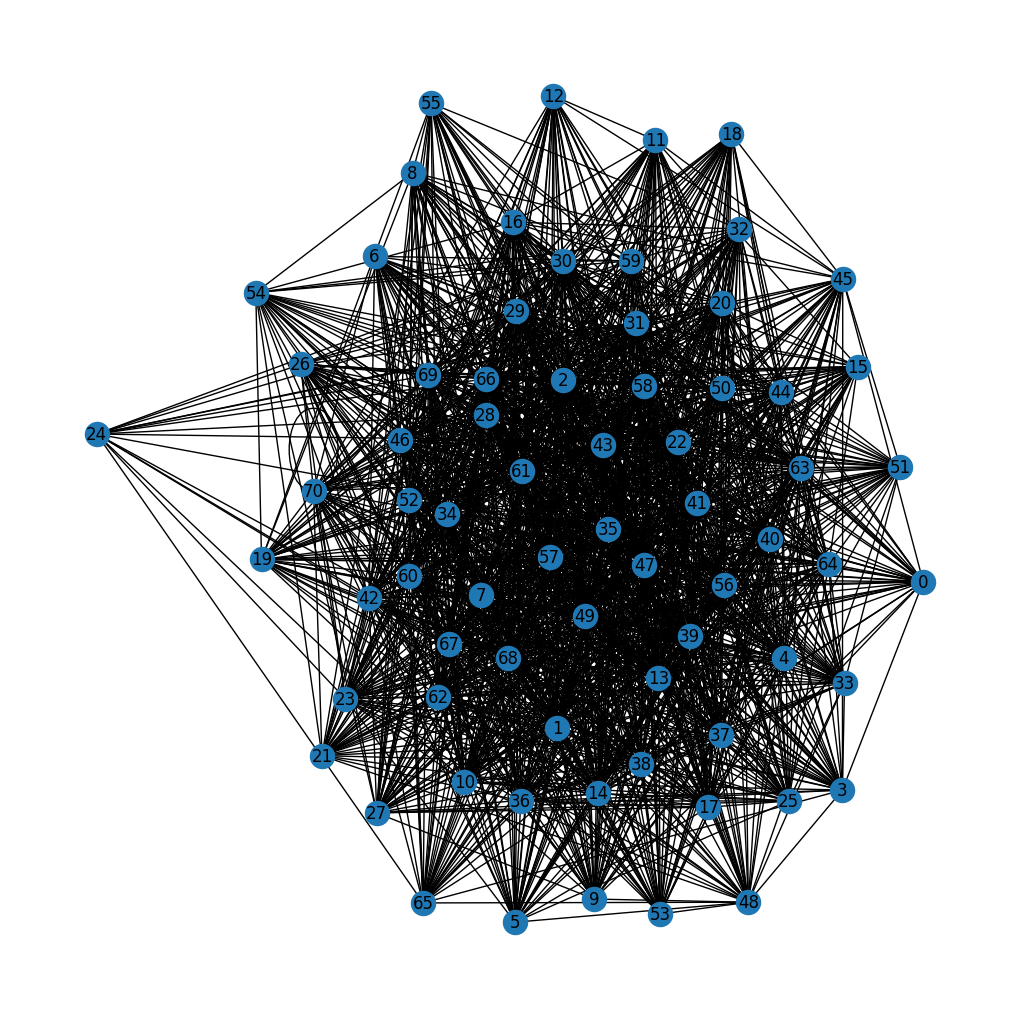

In [10]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [11]:
def greedy_set_cover(universe, subsets):
    covered = set()  # Tracks covered elements
    cover_sets = []  # Holds chosen subsets
    
    counter = 0
    while covered != universe:
        counter += 1
        if counter > len(subsets)**2:
            print("Infinite loop detected.")
            break
        best_subset = None
        max_covered = set()
        
        for subset in subsets:
            new_covered = subset - covered  # Calculate elements covered by the subset
            if len(new_covered) > len(max_covered):
                best_subset = subset
                max_covered = new_covered
        
        if(best_subset == None):
            break
        cover_sets.append(best_subset)
        covered |= max_covered
    
    return cover_sets

universe = set()
for subset in all_kernel_number:
    universe |= subset
print("Universe:", universe)


Universe: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}


In [12]:
x = [len(i) for i in all_kernel_number]

unique_x = list(set(x))
for i in unique_x:
    print(i, x.count(i))


4 4
5 30
6 344
7 1814
8 5150
9 8374
10 8126
11 4318
12 756
13 38


In [32]:
def same_day_subjects(subjects):
    subjects = set(subjects)
    temp = [x for x in all_kernel_code if subjects.issubset(x)]
    temp.sort(key=lambda x: len(x), reverse=True)
    return temp

In [47]:
temp = same_day_subjects([2010115, 2010125, 1740417, 1730420])
print(temp)
print([len(x) for x in temp])
print(temp[0])


[{1740417, 2010115, 1734308, 1712452, 1914251, 2010125, 1732207, 1710417, 1730420, 1914106}, {1740417, 2010115, 1734308, 1914251, 2010125, 1732207, 1718416, 1710417, 1730420, 1914106}, {1740417, 1712417, 2010115, 1734308, 1914251, 2010125, 1732207, 1730420, 1914106}, {1740417, 2010115, 1730120, 1914251, 2010125, 1710417, 1730420, 1914106}, {1740417, 1712417, 2010115, 1730120, 1914251, 2010125, 1730420, 1914106}]
[10, 10, 9, 8, 8]
{1740417, 2010115, 1734308, 1712452, 1914251, 2010125, 1732207, 1710417, 1730420, 1914106}


In [46]:
print(cross_matrix_df[1716310][[2010115, 2010125, 1740417, 1730420]])

2010115    0
2010125    1
1740417    1
1730420    0
Name: 1716310, dtype: int64
